In [1]:
##Loading required libraries

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import *

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import seaborn as sns
%matplotlib inline

# Data Manipulation

In [2]:
#Reading the raw data

data_raw = pd.read_csv('./Phising_dataset.csv')

In [3]:
print(data_raw.shape)

data_raw.head()

(11055, 31)


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [65]:
data_raw.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Result
-1    4898
 1    6157
dtype: int64


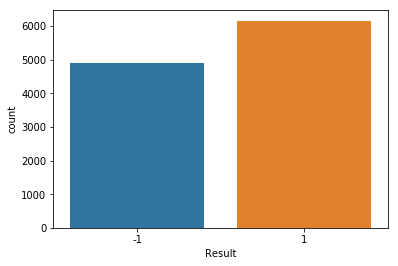

In [10]:
##Distribution of Result Variable

print(data_raw.groupby('Result').size())
sns.countplot(data_raw.Result,label="Count")

In [3]:
#Separating response (class) column from other variables

X=data_raw.drop('Result',axis=1) #Predictors
y=data_raw['Result'] #Response
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [4]:
#Splitting dataset into training and testing

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

In [6]:
X_train.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10168,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,1,-1,1,1,-1,0,-1,1,1,1
10167,-1,-1,1,1,1,-1,1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,1,-1,1
2115,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,1,-1,-1,1,0,1
1699,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,-1,0,1
1379,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,-1,1,0,1


# Important functions for Plotting Learning Curve and Getting best parameter for classifier

In [5]:
###Function for plotting learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [6]:
##Creating function to get best parameters for the classifier
def getParametersFromGridSearchCV(X_train, y_train, classifier, par_grid):

    kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
    
    model = GridSearchCV(estimator = classifier, param_grid=par_grid, cv= kfold, return_train_score=True, n_jobs=4)
    model.fit(X_train, y_train)
    print(model.best_params_)
    print(model.best_score_)
    return model.cv_results_["mean_train_score"], model.cv_results_["mean_test_score"], model.cv_results_["mean_fit_time"], model.cv_results_["params"]

# Implementing Models

# 1. Decision Tree

In [8]:
#Creating decision tree
dtree = DecisionTreeClassifier(random_state=20)
par_grid_tree = {'criterion': ['gini','entropy'],'max_depth': [5,10,15,20,25,30,50]} 
train_score,test_score,time,params = getParametersFromGridSearchCV(X_train, y_train,dtree,par_grid_tree)  

{'criterion': 'entropy', 'max_depth': 25}
0.956448694753


In [9]:
##Printing scores, times and parameters selected
print("Train_score =", train_score,"\n","\n","Test_score =",test_score,"\n","\n","Fit_time =", time,"\n","\n","Params =",params)

Train_score = [ 0.92146981  0.96306819  0.98617212  0.99063783  0.99102553  0.99102553
  0.99102553  0.92066568  0.95659225  0.98233821  0.98953217  0.99095373
  0.99102553  0.99102553] 
 
 Test_score = [ 0.91910054  0.94675627  0.95541484  0.95476867  0.95554407  0.95554407
  0.95554407  0.91664513  0.94391316  0.95347635  0.95489791  0.95644869
  0.95631946  0.95631946] 
 
 Fit_time = [ 0.02713685  0.03597453  0.02513263  0.02344072  0.02636395  0.02191055
  0.02193735  0.0129009   0.0187793   0.0170548   0.0190485   0.01742074
  0.01735353  0.01592176] 
 
 Params = [{'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 10}, {'criterion': 'gini', 'max_depth': 15}, {'criterion': 'gini', 'max_depth': 20}, {'criterion': 'gini', 'max_depth': 25}, {'criterion': 'gini', 'max_depth': 30}, {'criterion': 'gini', 'max_depth': 50}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 10}, {'criterion': 'entropy', 'max_depth': 15}, {'criterion': 'en

# Testing Accuracy and Learning Curve for DT

In [22]:
##Testing accuracy on y_test with best parameters
dt_clf = DecisionTreeClassifier( max_depth=25, criterion = "entropy", random_state=20 )
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy_score(y_test,y_pred)


0.96110943623756406

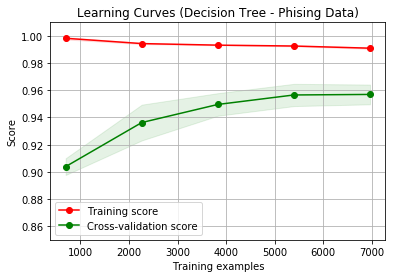

In [14]:
###Plotting Learning Curve for DT

title = "Learning Curves (Decision Tree - Phising Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

dt_clf = DecisionTreeClassifier( max_depth=25, criterion = "entropy", random_state=20 )

plot_learning_curve(dt_clf, title, X_train, y_train, ylim=(0.85, 1.01), cv=10, n_jobs=4)
plt.show()

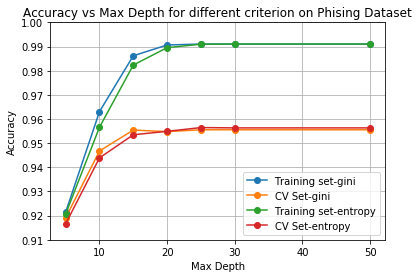

In [10]:
##Plotting accuracy vs max depth for each criterion curve 

index_gini = range(0,7)
index_entropy = range(7,14)

train_score_gini = []
test_score_gini = []
for i in index_gini:
    train_score_gini.append(train_score.tolist()[i])
    test_score_gini.append(test_score.tolist()[i])

train_score_entropy = []
test_score_entropy = []
for j in index_entropy:
    train_score_entropy.append(train_score.tolist()[j])
    test_score_entropy.append(test_score.tolist()[j])    
    

plt.figure()
plt.grid()    
plt.plot([5,10,15,20,25,30,50], train_score_gini, 'o-', label = "Training set-gini")
plt.plot([5,10,15,20,25,30,50], test_score_gini, 'o-', label = "CV Set-gini")
plt.plot([5,10,15,20,25,30,50], train_score_entropy, 'o-', label = "Training set-entropy")
plt.plot([5,10,15,20,25,30,50], test_score_entropy, 'o-', label = "CV Set-entropy")


#plt.xlim(0,60)
plt.ylim(0.91,1.00)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Accuracy vs Max Depth for different criterion on Phising Dataset')
plt.legend(loc ="best")
plt.show()

# 2. Gradient Boosting Classifier

In [134]:
#Creating Gradient Boosting Classifier
GB_clf = GradientBoostingClassifier(random_state=20)
par_grid_GB = {'n_estimators': [50,100,150,200,250,300,350,400],'max_depth': [5]} 
train_score,test_score,time,params = getParametersFromGridSearchCV(X_train, y_train,GB_clf,par_grid_GB)  

{'max_depth': 5, 'n_estimators': 350}
0.971051951409


In [135]:
##Printing scores, times and parameters selected
print("Train_score =", train_score,"\n","\n","Test_score =",test_score,"\n","\n","Fit_time =", time,"\n","\n","Params =",params)

Train_score = [ 0.95871747  0.97459865  0.97972489  0.98436287  0.98710548  0.98841216
  0.98930243  0.98986244] 
 
 Test_score = [ 0.95102094  0.9648488   0.96769191  0.96975963  0.96988886  0.97092272
  0.97105195  0.97066425] 
 
 Fit_time = [ 0.81562581  1.69587379  2.4913702   3.34068551  4.1529989   5.15980136
  6.04107115  7.67084317] 
 
 Params = [{'max_depth': 5, 'n_estimators': 50}, {'max_depth': 5, 'n_estimators': 100}, {'max_depth': 5, 'n_estimators': 150}, {'max_depth': 5, 'n_estimators': 200}, {'max_depth': 5, 'n_estimators': 250}, {'max_depth': 5, 'n_estimators': 300}, {'max_depth': 5, 'n_estimators': 350}, {'max_depth': 5, 'n_estimators': 400}]


In [13]:
##Trying max_depth=10
GB_clf = GradientBoostingClassifier(random_state=20)
par_grid_GB = {'n_estimators': [50,100,150,200,250,300,350,400],'max_depth': [10]} 
train_score_G1,test_score_G1,time_G1,params_G1 = getParametersFromGridSearchCV(X_train, y_train,GB_clf,par_grid_GB)  

{'max_depth': 10, 'n_estimators': 100}
0.97040578961


In [14]:
##Printing scores, times and parameters selected
print("Train_score =", train_score_G1,"\n","\n","Test_score =",test_score_G1,"\n","\n","Fit_time =", time_G1,"\n","\n","Params =",params_G1)

Train_score = [ 0.98869933  0.99102553  0.99102553  0.99102553  0.99102553  0.99102553
  0.99102553  0.99102553] 
 
 Test_score = [ 0.96691652  0.97040579  0.96820884  0.9696304   0.9692427   0.96937193
  0.96937193  0.96911347] 
 
 Fit_time = [  3.31243148   7.56958904  11.21942105  19.15718532  22.25433338
  21.89035423  20.96933885  23.11354218] 
 
 Params = [{'max_depth': 10, 'n_estimators': 50}, {'max_depth': 10, 'n_estimators': 100}, {'max_depth': 10, 'n_estimators': 150}, {'max_depth': 10, 'n_estimators': 200}, {'max_depth': 10, 'n_estimators': 250}, {'max_depth': 10, 'n_estimators': 300}, {'max_depth': 10, 'n_estimators': 350}, {'max_depth': 10, 'n_estimators': 400}]


In [133]:
##Testing accuracy on y_test with best parameters
GB_clf = GradientBoostingClassifier( max_depth=5, n_estimators= 350,random_state= 20)
GB_clf.fit(X_train, y_train)
y_pred = GB_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.97105818510702446

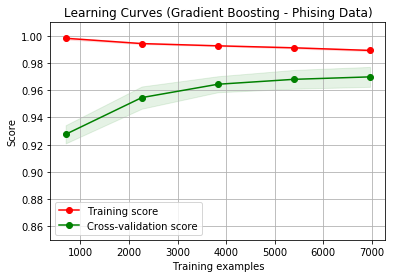

In [16]:
###Plotting Learning Curve for Gradient Boosting

title = "Learning Curves (Gradient Boosting - Phising Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

GB_clf = GradientBoostingClassifier( max_depth=5, n_estimators =350 , random_state=20 )

plot_learning_curve(GB_clf, title, X_train, y_train, ylim=(0.85, 1.01), cv=10, n_jobs=4)
plt.show()

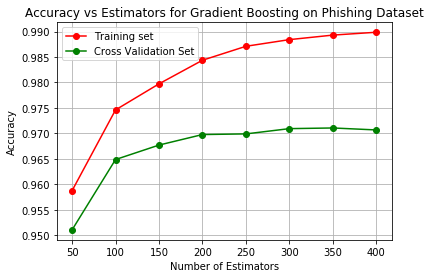

In [152]:
##Plotting Accuracy vs n_estimators graph using matplotlib

plt.figure()
#ax = fig.add_subplot(111)
plt.grid()
plt.plot(range(50,450,50), train_score.tolist(), 'o-', color="r", label = "Training set")
plt.plot(range(50,450,50), test_score.tolist(), 'o-', color="g", label = "Cross Validation Set")
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Accuracy vs Estimators for Gradient Boosting on Phishing Dataset')
#plt.tight_layout()
plt.legend()
plt.show()

# 3. SVM

In [162]:
#Creating SVM Classifier
SVM_clf = SVC(random_state=200)
par_grid_SVM = {'kernel': ['linear','rbf', 'poly'], 'C': [1,5,10,20,50]} 
train_score3,test_score3,time3,params3 = getParametersFromGridSearchCV(X_train, y_train,SVM_clf,par_grid_SVM)

{'C': 50, 'kernel': 'rbf'}
0.961617989144


In [163]:
##Printing scores, times and parameters selected
print("Train_score =", train_score3,"\n","\n","Test_score =",test_score3,"\n","\n","Fit_time =", time3,"\n","\n","Params =",params3)

Train_score = [ 0.93076021  0.95041787  0.9544815   0.93061661  0.96628467  0.96802213
  0.93055917  0.97304785  0.97322019  0.93053045  0.97731253  0.97683868
  0.93058789  0.98103156  0.98067256] 
 
 Test_score = [ 0.9296976   0.94585164  0.94817782  0.92956836  0.9556733   0.95502714
  0.9293099   0.95903334  0.95877488  0.9293099   0.95903334  0.95799948
  0.9293099   0.96161799  0.95787025] 
 
 Fit_time = [  1.43794415   1.16742492   1.01384461   3.45834973   1.08532677
   0.99910083   5.16450977   1.12211504   0.98580413   8.73135803
   1.26813087   1.15193629  18.13828862   1.28474402   1.25327911] 
 
 Params = [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'poly'}, {'C': 5, 'kernel': 'linear'}, {'C': 5, 'kernel': 'rbf'}, {'C': 5, 'kernel': 'poly'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'poly'}, {'C': 20, 'kernel': 'linear'}, {'C': 20, 'kernel': 'rbf'}, {'C': 20, 'kernel': 'poly'}, {'C': 50, 'kernel': 'linear

In [169]:
##Testing accuracy on y_test with best parameters
SVM_clf = SVC( kernel= 'rbf', C = 50 ,random_state= 200)
SVM_clf.fit(X_train, y_train)
y_pred = SVM_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.9620138679529695

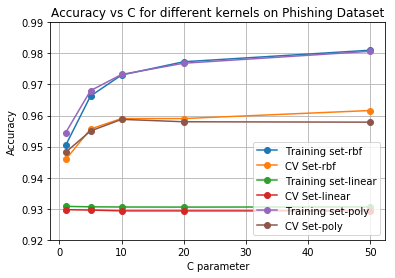

In [203]:
##Plotting accuracy vs C parameter for each kernel curve for rbf kernel
index_rbf = [1,4,7,10,13]
index_linear = [0,3,6,9,12]
index_poly = [2,5,8,11,14]

train_score_rbf = []
test_score_rbf = []
for i in index_rbf:
    train_score_rbf.append(train_score3.tolist()[i])
    test_score_rbf.append(test_score3.tolist()[i])

train_score_linear = []
test_score_linear = []
for j in index_linear:
    train_score_linear.append(train_score3.tolist()[j])
    test_score_linear.append(test_score3.tolist()[j])    
    
train_score_poly = []
test_score_poly = []
for k in index_poly:
    train_score_poly.append(train_score3.tolist()[k])
    test_score_poly.append(test_score3.tolist()[k])      
    
plt.figure()
plt.grid()    
plt.plot([1,5,10,20,50], train_score_rbf, 'o-', label = "Training set-rbf")
plt.plot([1,5,10,20,50], test_score_rbf, 'o-', label = "CV Set-rbf")
plt.plot([1,5,10,20,50], train_score_linear, 'o-', label = "Training set-linear")
plt.plot([1,5,10,20,50], test_score_linear, 'o-', label = "CV Set-linear")
plt.plot([1,5,10,20,50], train_score_poly, 'o-', label = "Training set-poly")
plt.plot([1,5,10,20,50], test_score_poly, 'o-', label = "CV Set-poly")

#plt.xlim(0,60)
plt.ylim(0.92,0.99)
plt.ylabel('Accuracy')
plt.xlabel('C parameter')
plt.title('Accuracy vs C for different kernels on Phishing Dataset')
plt.legend(loc ="best")
plt.show()

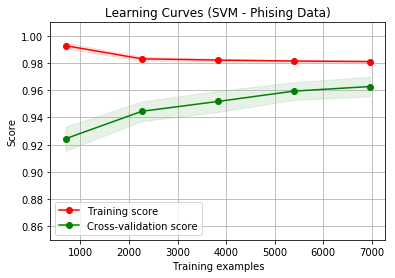

In [166]:
###Plotting Learning Curve for SVM

title = "Learning Curves (SVM - Phising Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

SVM_clf = SVC( kernel= 'rbf', C = 50,random_state= 200)

plot_learning_curve(SVM_clf, title, X_train, y_train, ylim=(0.85, 1.01), cv=10, n_jobs=4)
plt.show()

# 4. KNN

In [174]:
#Creating KNN Classifier
KNN_clf = KNeighborsClassifier()
par_grid_KNN = {'n_neighbors' : range(5,65,10)} 
train_score4,test_score4,time4,params4 = getParametersFromGridSearchCV(X_train, y_train,KNN_clf,par_grid_KNN)

{'n_neighbors': 5}
0.936417678987


In [175]:
##Printing scores, times and parameters selected
print("Train_score =", train_score4,"\n","\n","Test_score =",test_score4,"\n","\n","Fit_time =", time4,"\n","\n","Params =",params4)

Train_score = [ 0.96158926  0.93953363  0.92943914  0.92694064  0.92319292  0.91917234] 
 
 Test_score = [ 0.93641768  0.92840527  0.92194365  0.92258982  0.91948824  0.9157405 ] 
 
 Fit_time = [ 0.07645829  0.08444681  0.07483392  0.08275874  0.07108984  0.07045393] 
 
 Params = [{'n_neighbors': 5}, {'n_neighbors': 15}, {'n_neighbors': 25}, {'n_neighbors': 35}, {'n_neighbors': 45}, {'n_neighbors': 55}]


In [24]:
##Testing accuracy on y_test with best parameters
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.93729273439855287

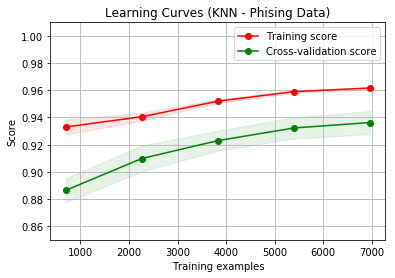

In [180]:
###Plotting Learning Curve for KNN

title = "Learning Curves (KNN - Phising Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

KNN_clf = KNeighborsClassifier(n_neighbors=5)

plot_learning_curve(KNN_clf, title, X_train, y_train, ylim=(0.85, 1.01), cv=10, n_jobs=4)
plt.show()

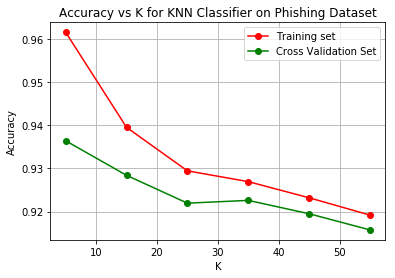

In [181]:
##Accuracy vs k graph

plt.figure()
plt.grid()
plt.plot(range(5,65,10), train_score4.tolist(), 'o-', color="r", label = "Training set")
plt.plot(range(5,65,10), test_score4.tolist(), 'o-', color="g", label = "Cross Validation Set")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K for KNN Classifier on Phishing Dataset')
plt.legend()
plt.show()

# 5. Neural Network

In [244]:
#Creating Multi Layer Perceptron
MLP_clf = MLPClassifier(random_state =500, activation = 'tanh')
par_grid_MLP = {'max_iter' : range(50,450,50), 'hidden_layer_sizes' : [(100,2),(100,3),(100,4),(100,5)]} 
train_score_iter,test_score_iter,time_iter,params_iter = getParametersFromGridSearchCV(X_train, y_train,MLP_clf,par_grid_MLP)

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

{'hidden_layer_sizes': (100, 5), 'max_iter': 150}
0.960454897906


In [245]:
##Printing scores, times and parameters selected
print("Train_score =", train_score_iter,"\n","\n","Test_score =",test_score_iter,"\n","\n","Fit_time =", time_iter,"\n","\n","Params =",
      params_iter)

Train_score = [ 0.95934924  0.97459861  0.974929    0.974929    0.974929    0.974929
  0.974929    0.974929    0.95779847  0.97454118  0.97515864  0.97515864
  0.97515864  0.97515864  0.97515864  0.97515864  0.95838713  0.97146848
  0.97146848  0.97146848  0.97146848  0.97146848  0.97146848  0.97146848
  0.95967946  0.97533101  0.97596281  0.97596281  0.97596281  0.97596281
  0.97596281  0.97596281] 
 
 Test_score = [ 0.94921168  0.9600672   0.95916257  0.95916257  0.95916257  0.95916257
  0.95916257  0.95916257  0.94921168  0.95722409  0.95735332  0.95735332
  0.95735332  0.95735332  0.95735332  0.95735332  0.94675627  0.95851641
  0.95877488  0.95877488  0.95877488  0.95877488  0.95877488  0.95877488
  0.94947015  0.96019643  0.9604549   0.9604549   0.9604549   0.9604549
  0.9604549   0.9604549 ] 
 
 Fit_time = [ 1.61798382  3.1350322   3.42302032  3.59149952  3.40259264  3.44188545
  3.40827169  3.41903636  1.62333946  3.22915032  3.37007568  3.42086585
  3.44892261  3.36988297  3.3

In [221]:
##Trying different parameters
par_grid_MLP = {'max_iter' : range(150,350,50), 'hidden_layer_sizes' : [(100,5),(100,6),(100,7),(100,8)]} 
train_score_iter1,test_score_iter1,time_iter1,params_iter1 = getParametersFromGridSearchCV(X_train, y_train,MLP_clf,par_grid_MLP)


{'hidden_layer_sizes': (100, 7), 'max_iter': 150}
0.960584130266


In [224]:
##Printing scores, times and parameters selected
print("Train_score =", train_score_iter1,"\n","\n","Test_score =",test_score_iter1,"\n","\n","Fit_time =", time_iter1,"\n","\n","Params =",
      params_iter1)

Train_score = [ 0.97596281  0.97596281  0.97596281  0.97596281  0.97501517  0.97501517
  0.97501517  0.97501517  0.97726937  0.97726937  0.97726937  0.97726937
  0.9763363   0.9763363   0.9763363   0.9763363 ] 
 
 Test_score = [ 0.9604549   0.9604549   0.9604549   0.9604549   0.95761179  0.95761179
  0.95761179  0.95761179  0.96058413  0.96058413  0.96058413  0.96058413
  0.96058413  0.96058413  0.96058413  0.96058413] 
 
 Fit_time = [ 3.12384458  3.15136185  3.11648571  3.11415737  3.02709141  3.04868054
  3.04954507  3.08000908  3.31984556  3.31505904  3.53521628  3.33891518
  3.36482425  3.37217455  3.36090081  3.3855072 ] 
 
 Params = [{'hidden_layer_sizes': (100, 5), 'max_iter': 150}, {'hidden_layer_sizes': (100, 5), 'max_iter': 200}, {'hidden_layer_sizes': (100, 5), 'max_iter': 250}, {'hidden_layer_sizes': (100, 5), 'max_iter': 300}, {'hidden_layer_sizes': (100, 6), 'max_iter': 150}, {'hidden_layer_sizes': (100, 6), 'max_iter': 200}, {'hidden_layer_sizes': (100, 6), 'max_iter': 2

In [8]:
##Testing accuracy on y_test with best parameters
MLP_clf = MLPClassifier(random_state =500, activation = 'tanh', hidden_layer_sizes = (100,5), max_iter = 150, solver = 'adam')
MLP_clf.fit(X_train, y_train)
y_pred = MLP_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.96563159481459149

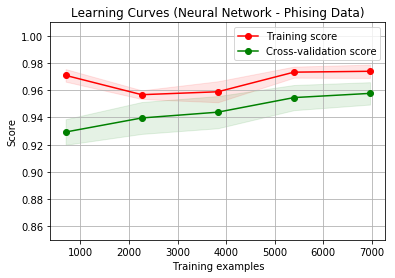

In [240]:
###Plotting Learning Curve for Neural Network

title = "Learning Curves (Neural Network - Phising Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

MLP_clf =MLPClassifier(random_state =500, activation = 'tanh', hidden_layer_sizes = (100,5), max_iter = 150)

plot_learning_curve(MLP_clf, title, X_train, y_train, ylim=(0.85, 1.01), cv=10, n_jobs=4)
plt.show()

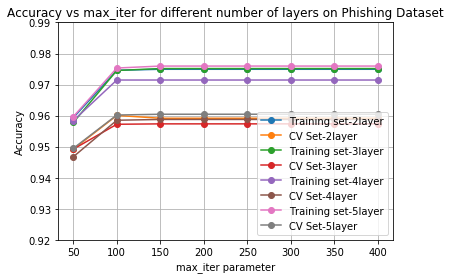

In [246]:
##Plotting accuracy vs iterations

##Plotting accuracy vs max_iter parameter for each kernel curve for rbf kernel
index_layer2 = range(0,8)
index_layer3 = range(8,16)
index_layer4 = range(16,24)
index_layer5 = range(24,32)

train_score_layer2 = []
test_score_layer2 = []
for i in index_layer2:
    train_score_layer2.append(train_score_iter.tolist()[i])
    test_score_layer2.append(test_score_iter.tolist()[i])

train_score_layer3 = []
test_score_layer3 = []
for j in index_layer3:
    train_score_layer3.append(train_score_iter.tolist()[j])
    test_score_layer3.append(test_score_iter.tolist()[j])    
    
train_score_layer4 = []
test_score_layer4 = []
for k in index_layer4:
    train_score_layer4.append(train_score_iter.tolist()[k])
    test_score_layer4.append(test_score_iter.tolist()[k])      

train_score_layer5 = []
test_score_layer5 = []
for m in index_layer5:
    train_score_layer5.append(train_score_iter.tolist()[m])
    test_score_layer5.append(test_score_iter.tolist()[m])     
    
plt.figure()
plt.grid()    
plt.plot(range(50,450,50), train_score_layer2, 'o-', label = "Training set-2layer")
plt.plot(range(50,450,50), test_score_layer2, 'o-', label = "CV Set-2layer")
plt.plot(range(50,450,50), train_score_layer3, 'o-', label = "Training set-3layer")
plt.plot(range(50,450,50), test_score_layer3, 'o-', label = "CV Set-3layer")
plt.plot(range(50,450,50), train_score_layer4, 'o-', label = "Training set-4layer")
plt.plot(range(50,450,50), test_score_layer4, 'o-', label = "CV Set-4layer")
plt.plot(range(50,450,50), train_score_layer5, 'o-', label = "Training set-5layer")
plt.plot(range(50,450,50), test_score_layer5, 'o-', label = "CV Set-5layer")

#plt.xlim(0,60)
plt.ylim(0.92,0.99)
plt.ylabel('Accuracy')
plt.xlabel('max_iter parameter')
plt.title('Accuracy vs max_iter for different number of layers on Phishing Dataset')
plt.legend(loc ="best")
plt.show()
